* Goal: identify changes occurred across different time points

In [1]:
import os, sys, glob
import re
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import pprint

# 01 Compile data into one csv

In [2]:
mainpath = 'D:\PerlmutterData'
folder = 'segmentation_compiled_export'
data_folder = 'data'

path = os.path.join(mainpath, folder, data_folder)
print(path)

folders = ['cell_membrane', 'nucleus', 'mito', 'cristae', 'inclusion', 'ER']

D:\PerlmutterData\segmentation_compiled_export\data


In [3]:
target_list = glob.glob(os.path.join(path, 'compile', '*.csv'))
target_list = [os.path.basename(x) for x in target_list]
target_list = [os.path.splitext(x)[0] for x in target_list]
print(target_list)

['cell_membrane', 'cristae', 'ER', 'inclusion', 'mito', 'nodes', 'nucleus', 'points', 'segments_s']


In [4]:
file_meta = {
    'data_d00_batch01_loc01': 0,
    'data_d00_batch02_loc02': 0,
    'data_d00_batch02_loc03': 0,
    'data_d07_batch01_loc01': 7, 
    'data_d07_batch02_loc01': 7,
    'data_d07_batch02_loc02': 7, 
    'data_d14_batch01_loc01': 14, 
    'data_d17_batch01_loc01': 17,
    'data_d21_batch01_loc01': 21,
}


In [5]:
for i in folders:
    file_list = glob.glob(os.path.join(path, 'raw', i, '*.csv'))
    
    if not i in target_list:
        df = pd.DataFrame()

        for j in file_list:    
            data_temp = pd.read_csv(j, header = 1)
            
            filename_tmp = os.path.basename(j)
            
            # add filename
            data_temp['filename'] = filename_tmp
            
            # add day
            filename_noext = os.path.splitext(filename_tmp)[0]
            pattern = re.compile("data_d[0-9][0-9]_batch[0-9][0-9]_loc[0-9][0-9]")
            original_filename = pattern.search(filename_noext).group(0)
            day_tmp = file_meta[original_filename]
            
            data_temp['day'] = day_tmp
            
            df = df.append(data_temp, ignore_index = True)
            
        display(df)
        df.to_csv(os.path.join(path, 'compile', i + '.csv'))
    

# 02 Load data

## 02-01 Calculate mean and tota|l volumn for mito, cristate, ER and inclusion

In [6]:
df_mito = pd.read_csv(os.path.join(path, 'compile', 'mito' + '.csv'))
df_mito['Volume3d_µm^3'] = df_mito['Volume3d']/1e9
df_mito['Area3d_µm^2'] = df_mito['Area3d']/1e6

df_mito_sum_grouped = df_mito.groupby(['day', 'filename']).sum().reset_index()
df_mito_mean_grouped = df_mito.groupby(['day', 'filename']).mean().reset_index()

df_cristae = pd.read_csv(os.path.join(path, 'compile', 'cristae' + '.csv'))
df_cristae['Volume3d_µm^3'] = df_cristae['Volume3d']/1e9
df_cristae['Area3d_µm^2'] = df_cristae['Area3d']/1e6

df_cristae_sum_grouped = df_cristae.groupby(['day', 'filename']).sum().reset_index()
df_cristae_mean_grouped = df_cristae.groupby(['day', 'filename']).mean().reset_index()

df_ER = pd.read_csv(os.path.join(path, 'compile', 'ER' + '.csv'))
df_ER['Volume3d_µm^3'] = df_ER['Volume3d']/1e9
df_ER['Area3d_µm^2'] = df_ER['Area3d']/1e6

df_ER_sum_grouped = df_ER.groupby(['day', 'filename']).sum().reset_index()
df_ER_mean_grouped = df_ER.groupby(['day', 'filename']).mean().reset_index()

df_inclusion = pd.read_csv(os.path.join(path, 'compile', 'inclusion' + '.csv'))
df_inclusion['Volume3d_µm^3'] = df_inclusion['Volume3d']/1e9
df_inclusion['Area3d_µm^2'] = df_inclusion['Area3d']/1e6

df_inclusion_sum_grouped = df_inclusion.groupby(['day', 'filename']).sum().reset_index()
df_inclusion_mean_grouped = df_inclusion.groupby(['day', 'filename']).mean().reset_index()

## 02-02 Calculate the total volume for cell membrane and nucleus

In [7]:
df_nucleus = pd.read_csv(os.path.join(path, 'compile', 'nucleus' + '.csv'))
df_nucleus['Volume3d_µm^3'] = df_nucleus['Volume3d']/1e9
df_nucleus['Area3d_µm^2'] = df_nucleus['Area3d']/1e6
df_nucleus_sum_grouped = df_nucleus.groupby(['day', 'filename']).sum().reset_index()

In [8]:
df_cell_membrane = pd.read_csv(os.path.join(path, 'compile', 'cell_membrane' + '.csv'))
df_cell_membrane['Volume3d_µm^3'] = df_cell_membrane['Volume3d']/1e9
df_cell_membrane['Area3d_µm^2'] = df_cell_membrane['Area3d']/1e6
df_cell_membrane_sum_grouped = df_cell_membrane.groupby(['day', 'filename']).sum().reset_index()

In [9]:
df_cell_membrane_sum_grouped

,day,filename,Unnamed: 0,Volume3d,Area3d,BaryCenterX,BaryCenterY,BaryCenterZ,Mean,index,Volume3d_µm^3,Area3d_µm^2
0,0,data_d00_batch01_loc01_cell_membrane.csv,0,1.596130e+12,1.079330e+09,12918.30,2252.73,11759.30,1,1,1596.130000,1079.330000
1,0,data_d00_batch02_loc02_cell_membrane.csv,1,1.948900e+12,9.889220e+08,9006.11,3391.34,9221.07,1,1,1948.900000,988.922000
2,0,data_d00_batch02_loc03_cell_membrane.csv,2,8.628210e+11,6.087890e+08,11467.20,2299.98,7031.91,1,1,862.821000,608.789000
3,7,data_d07_batch01_loc01_cell_membrane.csv,3,9.045550e+11,5.918870e+08,14932.10,3010.33,6637.82,1,1,904.555000,591.887000
4,7,data_d07_batch02_loc01_cell_membrane.csv,4,1.233220e+12,7.556690e+08,9333.23,2766.17,7790.46,1,1,1233.220000,755.669000
5,7,data_d07_batch02_loc02_cell_membrane.csv,5,1.558180e+12,9.603180e+08,11912.20,2477.45,8127.90,1,1,1558.180000,960.318000
6,14,data_d14_batch01_loc01_cell_membrane.csv,6,3.303970e+12,1.362340e+09,12857.50,4242.07,10056.70,1,1,3303.970000,1362.340000
7,17,data_d17_batch01_loc01_01_cell_membrane.csv,7,1.339080e+12,7.927630e+08,8731.14,3288.59,4879.19,1,1,1339.080000,792.763000
8,17,data_d17_batch01_loc01_02_cell_membrane.csv,8,7.508310e+11,5.684290e+08,15772.00,2466.69,16203.10,1,1,750.831000,568.429000
9,21,data_d21_batch01_loc01_cell_membrane.csv,19,1.843051e+12,1.168280e+09,29974.20,7502.07,12179.07,2,3,1843.051418,1168.280059


### 02-03 Calculate the volume of cytoplasm

In [10]:
df_cyto = pd.DataFrame()
df_cyto['filename'] = df_cell_membrane_sum_grouped['filename']
df_cyto['Volume3d_µm^3'] = df_cell_membrane_sum_grouped['Volume3d_µm^3'] - df_nucleus_sum_grouped['Volume3d_µm^3']
display(df_cyto)

,filename,Volume3d_µm^3
0,data_d00_batch01_loc01_cell_membrane.csv,1246.356000
1,data_d00_batch02_loc02_cell_membrane.csv,1300.943000
2,data_d00_batch02_loc03_cell_membrane.csv,680.671000
3,data_d07_batch01_loc01_cell_membrane.csv,519.512000
4,data_d07_batch02_loc01_cell_membrane.csv,875.936000
5,data_d07_batch02_loc02_cell_membrane.csv,1062.249000
6,data_d14_batch01_loc01_cell_membrane.csv,2851.499000
7,data_d17_batch01_loc01_01_cell_membrane.csv,844.659000
8,data_d17_batch01_loc01_02_cell_membrane.csv,496.472000
9,data_d21_batch01_loc01_cell_membrane.csv,1519.363418


### 02-04 Compile total volume of mito, cristate, ER and inclusion into one table
1. raw value
2. normalized by the total volume of cytoplasm

In [11]:
df_sum_compiled = pd.DataFrame()
df_sum_compiled[['filename', 'day']] = df_cell_membrane_sum_grouped[['filename', 'day']]
df_sum_compiled['day'] = df_sum_compiled['day'].astype('int8')
df_sum_compiled[['mito_Volume3d_µm^3', 'mito_Area3d_µm^2']] = df_mito_sum_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]
df_sum_compiled[['cristae_Volume3d_µm^3', 'cristae_Area3d_µm^2']] = df_cristae_sum_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]
df_sum_compiled[['ER_Volume3d_µm^3', 'ER_Area3d_µm^2']] = df_ER_sum_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]

df_inclusion_sum_tmp = df_inclusion_sum_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]
df_inclusion_sum_fill = pd.DataFrame([[0, 0]], columns = ['Volume3d_µm^3', 'Area3d_µm^2'])
df_inclusion_sum_tmp = df_inclusion_sum_fill.append(df_inclusion_sum_tmp, ignore_index = True)

df_sum_compiled[['inclusion_Volume3d_µm^3', 'inclusion_Area3d_µm^2']] = df_inclusion_sum_tmp
df_sum_compiled

,filename,day,mito_Volume3d_µm^3,mito_Area3d_µm^2,cristae_Volume3d_µm^3,cristae_Area3d_µm^2,ER_Volume3d_µm^3,ER_Area3d_µm^2,inclusion_Volume3d_µm^3,inclusion_Area3d_µm^2
0,data_d00_batch01_loc01_cell_membrane.csv,0,329.122874,2539.146333,125.122262,9500.149162,40.627818,1748.669052,0.000000,0.000000
1,data_d00_batch02_loc02_cell_membrane.csv,0,136.156238,1623.903160,64.224242,4673.912777,19.119638,739.128304,109.468365,902.541889
2,data_d00_batch02_loc03_cell_membrane.csv,0,103.213467,1046.297110,45.285632,3377.390519,23.918685,1004.646307,1.593595,19.121338
3,data_d07_batch01_loc01_cell_membrane.csv,7,43.118028,407.199865,17.211288,1273.696454,13.668791,499.139195,14.697196,116.219870
4,data_d07_batch02_loc01_cell_membrane.csv,7,87.822689,827.683718,35.413844,2649.040363,46.204013,1553.697695,9.862896,63.222781
5,data_d07_batch02_loc02_cell_membrane.csv,7,92.688649,1004.008391,39.713913,2883.003923,32.011120,1206.067670,3.755246,53.607291
6,data_d14_batch01_loc01_cell_membrane.csv,14,329.122874,2539.146333,125.122262,9500.149162,144.093364,5380.226705,456.518559,742.825330
7,data_d17_batch01_loc01_01_cell_membrane.csv,17,77.920876,719.326035,31.919217,2388.139876,48.083273,1774.882321,1.930615,27.836074
8,data_d17_batch01_loc01_02_cell_membrane.csv,17,44.933814,431.608306,18.624151,1394.269292,13.876992,566.365464,0.814875,9.758030
9,data_d21_batch01_loc01_cell_membrane.csv,21,118.693299,1052.321567,48.355537,3618.926789,41.996704,1566.584143,85.987873,300.281775


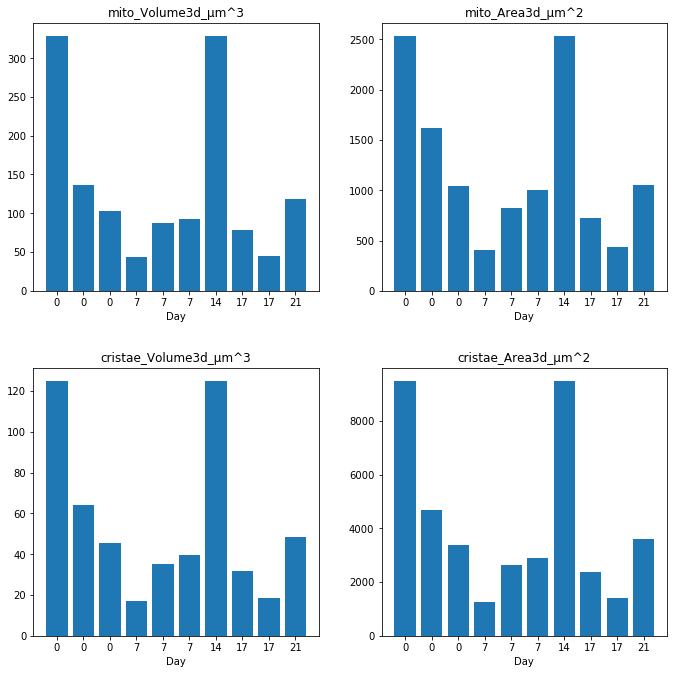

<Figure size 432x288 with 0 Axes>

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = 0
for i in range(2):
    for j in range(2):
        ax[i, j].bar(df_sum_compiled.index, 
                  df_sum_compiled.iloc[:, idx +2], 
                  tick_label=['0', '0', '0', '7', '7', '7', '14', '17', '17', '21'])
        ax[i, j].set_title(df_sum_compiled.columns[idx+2])
        ax[i, j].set_xlabel('Day')
        idx += 1
        # ax[i].set_ylabel('Total Volume ($µm^3$)')
    
fig.tight_layout(pad=3.0)
plt.show()

mainpath = 'D:\PerlmutterData'
folder = 'segmentation_compiled_export'
data_folder = 'data'

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plot', ))

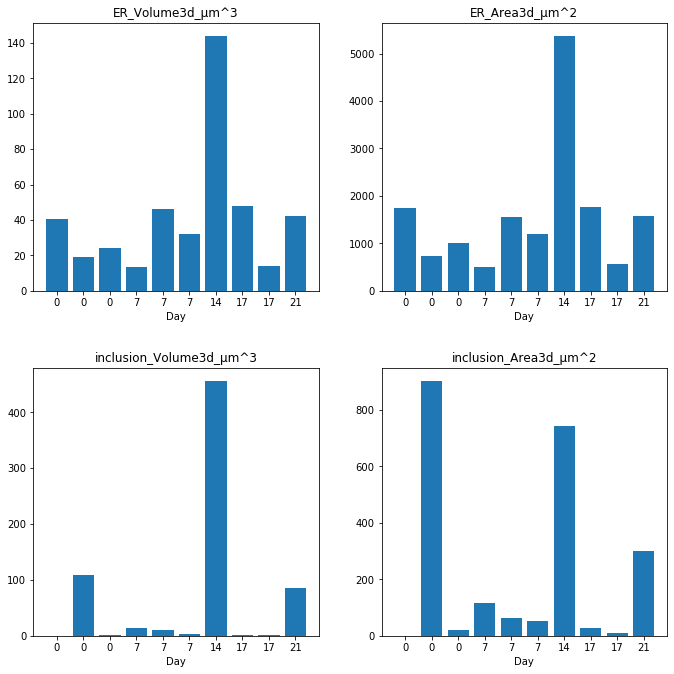

<Figure size 432x288 with 0 Axes>

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = 4
for i in range(2):
    for j in range(2):
        ax[i, j].bar(df_sum_compiled.index, 
                  df_sum_compiled.iloc[:, idx +2], 
                  tick_label=['0', '0', '0', '7', '7', '7', '14', '17', '17', '21'])
        ax[i, j].set_title(df_sum_compiled.columns[idx+2])
        ax[i, j].set_xlabel('Day')
        idx += 1
        # ax[i].set_ylabel('Total Volume ($µm^3$)')
    
fig.tight_layout(pad=3.0)
plt.show()

mainpath = 'D:\PerlmutterData'
folder = 'segmentation_compiled_export'
data_folder = 'data'

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plot', ))

In [14]:
df_sum_compiled_normalized = pd.DataFrame()
df_sum_compiled_normalized[['filename', 'day']] = df_cell_membrane_sum_grouped[['filename', 'day']]
cal_tmp = df_sum_compiled.iloc[:, 2:].div(df_cyto['Volume3d_µm^3'], axis=0)
df_sum_compiled_normalized = pd.concat([df_sum_compiled_normalized, cal_tmp], axis=1)
df_sum_compiled_normalized

,filename,day,mito_Volume3d_µm^3,mito_Area3d_µm^2,cristae_Volume3d_µm^3,cristae_Area3d_µm^2,ER_Volume3d_µm^3,ER_Area3d_µm^2,inclusion_Volume3d_µm^3,inclusion_Area3d_µm^2
0,data_d00_batch01_loc01_cell_membrane.csv,0,0.264068,2.037256,0.100390,7.622340,0.032597,1.403025,0.000000,0.000000
1,data_d00_batch02_loc02_cell_membrane.csv,0,0.104660,1.248251,0.049367,3.592711,0.014697,0.568148,0.084145,0.693760
2,data_d00_batch02_loc03_cell_membrane.csv,0,0.151635,1.537155,0.066531,4.961855,0.035140,1.475965,0.002341,0.028092
3,data_d07_batch01_loc01_cell_membrane.csv,7,0.082997,0.783812,0.033130,2.451717,0.026311,0.960785,0.028290,0.223710
4,data_d07_batch02_loc01_cell_membrane.csv,7,0.100262,0.944913,0.040430,3.024240,0.052748,1.773757,0.011260,0.072177
5,data_d07_batch02_loc02_cell_membrane.csv,7,0.087257,0.945172,0.037387,2.714057,0.030135,1.135391,0.003535,0.050466
6,data_d14_batch01_loc01_cell_membrane.csv,14,0.115421,0.890460,0.043879,3.331633,0.050532,1.886806,0.160098,0.260503
7,data_d17_batch01_loc01_01_cell_membrane.csv,17,0.092251,0.851617,0.037789,2.827342,0.056926,2.101300,0.002286,0.032955
8,data_d17_batch01_loc01_02_cell_membrane.csv,17,0.090506,0.869351,0.037513,2.808354,0.027951,1.140780,0.001641,0.019655
9,data_d21_batch01_loc01_cell_membrane.csv,21,0.078120,0.692607,0.031826,2.381870,0.027641,1.031079,0.056595,0.197637


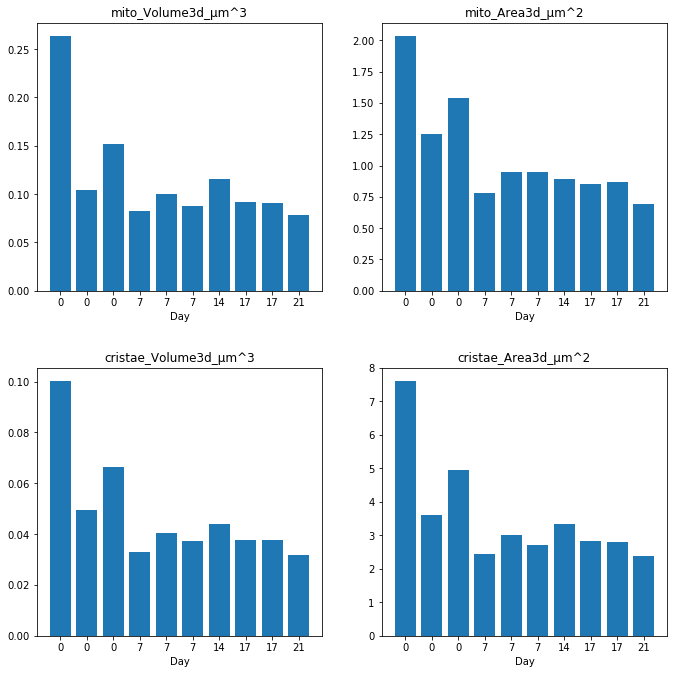

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = 0
for i in range(2):
    for j in range(2):
        ax[i, j].bar(df_sum_compiled_normalized.index, 
                  df_sum_compiled_normalized.iloc[:, idx +2], 
                  tick_label=['0', '0', '0', '7', '7', '7', '14', '17', '17', '21'])
        ax[i, j].set_title(df_sum_compiled_normalized.columns[idx+2])
        ax[i, j].set_xlabel('Day')
        idx += 1
        # ax[i].set_ylabel('Total Volume ($µm^3$)')
    
fig.tight_layout(pad=3.0)
plt.show()

mainpath = 'D:\PerlmutterData'
folder = 'segmentation_compiled_export'
data_folder = 'data'

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plot', ))

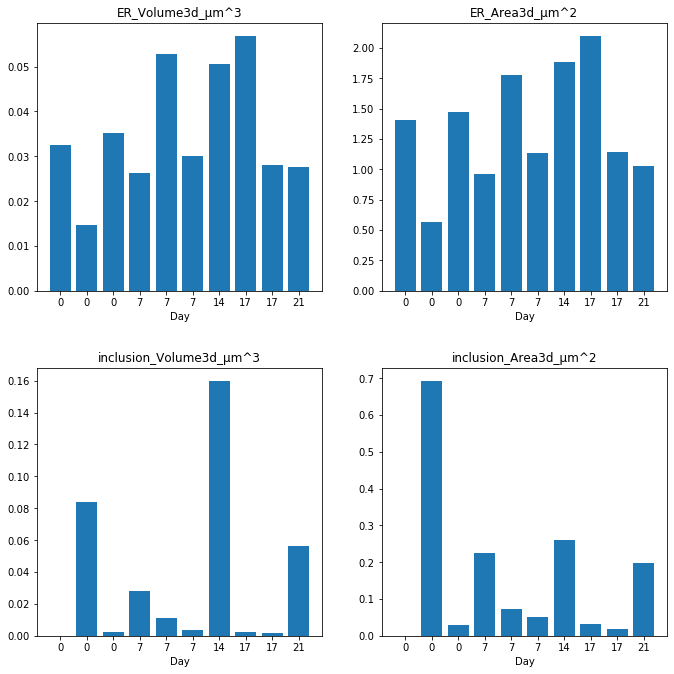

<Figure size 432x288 with 0 Axes>

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = 4
for i in range(2):
    for j in range(2):
        ax[i, j].bar(df_sum_compiled_normalized.index, 
                  df_sum_compiled_normalized.iloc[:, idx +2], 
                  tick_label=['0', '0', '0', '7', '7', '7', '14', '17', '17', '21'])
        ax[i, j].set_title(df_sum_compiled_normalized.columns[idx+2])
        ax[i, j].set_xlabel('Day')
        idx += 1
        # ax[i].set_ylabel('Total Volume ($µm^3$)')
    
fig.tight_layout(pad=3.0)
plt.show()

mainpath = 'D:\PerlmutterData'
folder = 'segmentation_compiled_export'
data_folder = 'data'

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plot', ))

### 02-05 Compile mean volume of mito, cristate, ER and inclusion into one table
1. raw value
2. normalized by the total volume of cytoplasm

In [42]:
df_mean_compiled = pd.DataFrame()
df_mean_compiled[['filename', 'day']] = df_cell_membrane_sum_grouped[['filename', 'day']]
df_mean_compiled['day'] = df_mean_compiled['day'].astype('int8')
df_mean_compiled[['mito_Volume3d_µm^3', 'mito_Area3d_µm^2']] = df_mito_mean_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]
df_mean_compiled[['cristae_Volume3d_µm^3', 'cristae_Area3d_µm^2']] = df_cristae_mean_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]
df_mean_compiled[['ER_Volume3d_µm^3', 'ER_Area3d_µm^2']] = df_ER_mean_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]

df_inclusion_mean_tmp = df_inclusion_mean_grouped[['Volume3d_µm^3', 'Area3d_µm^2']]
df_inclusion_mean_fill = pd.DataFrame([[0, 0]], columns = ['Volume3d_µm^3', 'Area3d_µm^2'])
df_inclusion_mean_tmp = df_inclusion_mean_fill.append(df_inclusion_mean_tmp, ignore_index = True)

df_mean_compiled[['inclusion_Volume3d_µm^3', 'inclusion_Area3d_µm^2']] = df_inclusion_mean_tmp
df_mean_compiled

,filename,day,mito_Volume3d_µm^3,mito_Area3d_µm^2,cristae_Volume3d_µm^3,cristae_Area3d_µm^2,ER_Volume3d_µm^3,ER_Area3d_µm^2,inclusion_Volume3d_µm^3,inclusion_Area3d_µm^2
0,data_d00_batch01_loc01_cell_membrane.csv,0,0.857091,6.612360,0.007178,0.545015,0.008055,0.346683,0.000000,0.000000
1,data_d00_batch02_loc02_cell_membrane.csv,0,0.306658,3.657440,0.013209,0.961315,0.005119,0.197892,1.216315,10.028243
2,data_d00_batch02_loc03_cell_membrane.csv,0,0.456697,4.629633,0.008641,0.644417,0.007923,0.332775,0.177066,2.124593
3,data_d07_batch01_loc01_cell_membrane.csv,7,0.317044,2.994117,0.008099,0.599387,0.010043,0.366744,0.408255,3.228330
4,data_d07_batch02_loc01_cell_membrane.csv,7,0.472165,4.449912,0.012771,0.955298,0.020444,0.687477,0.428822,2.748817
5,data_d07_batch02_loc02_cell_membrane.csv,7,0.485281,5.256588,0.012152,0.882192,0.009553,0.359913,0.234703,3.350456
6,data_d14_batch01_loc01_cell_membrane.csv,14,0.857091,6.612360,0.007178,0.545015,0.019525,0.729028,10.144857,16.507230
7,data_d17_batch01_loc01_01_cell_membrane.csv,17,0.701990,6.480415,0.008721,0.652497,0.022385,0.826295,0.107256,1.546449
8,data_d17_batch01_loc01_02_cell_membrane.csv,17,0.522486,5.018701,0.009032,0.676173,0.010070,0.411005,0.162975,1.951606
9,data_d21_batch01_loc01_cell_membrane.csv,21,0.507236,4.497101,0.009326,0.697961,0.012410,0.462939,4.525678,15.804304


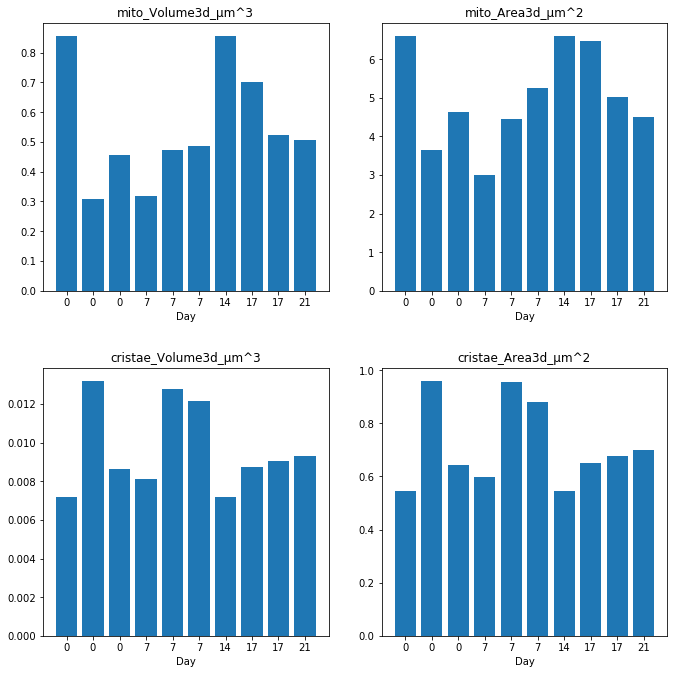

<Figure size 432x288 with 0 Axes>

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = 0
for i in range(2):
    for j in range(2):
        ax[i, j].bar(df_mean_compiled.index, 
                  df_mean_compiled.iloc[:, idx +2], 
                  tick_label=['0', '0', '0', '7', '7', '7', '14', '17', '17', '21'])
        ax[i, j].set_title(df_mean_compiled.columns[idx+2])
        ax[i, j].set_xlabel('Day')
        idx += 1
        # ax[i].set_ylabel('Total Volume ($µm^3$)')
    
fig.tight_layout(pad=3.0)
plt.show()

mainpath = 'D:\PerlmutterData'
folder = 'segmentation_compiled_export'
data_folder = 'data'

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plot', ))

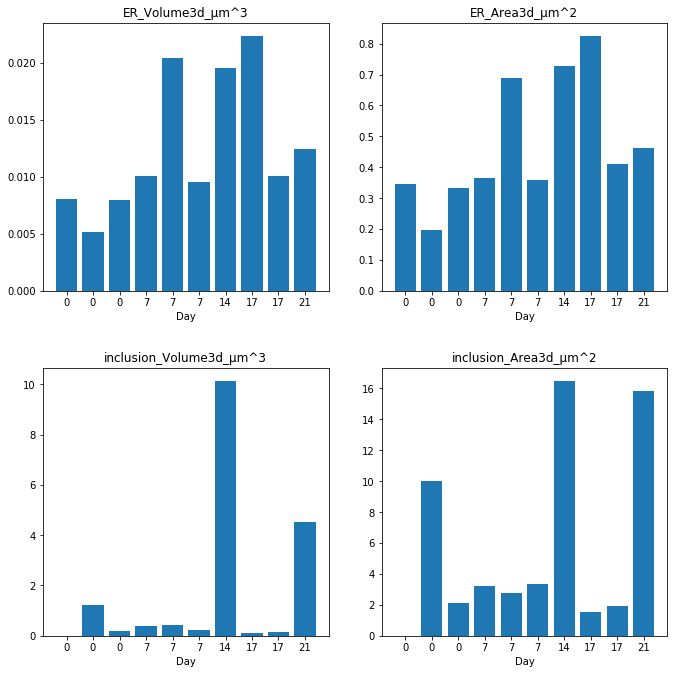

<Figure size 432x288 with 0 Axes>

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
idx = 4
for i in range(2):
    for j in range(2):
        ax[i, j].bar(df_mean_compiled.index, 
                  df_mean_compiled.iloc[:, idx +2], 
                  tick_label=['0', '0', '0', '7', '7', '7', '14', '17', '17', '21'])
        ax[i, j].set_title(df_mean_compiled.columns[idx+2])
        ax[i, j].set_xlabel('Day')
        idx += 1
        # ax[i].set_ylabel('Total Volume ($µm^3$)')
    
fig.tight_layout(pad=3.0)
plt.show()

mainpath = 'D:\PerlmutterData'
folder = 'segmentation_compiled_export'
data_folder = 'data'

plt.savefig(os.path.join(mainpath, folder, data_folder, 'plot', ))

In [20]:
'''
df_mean_compiled_normalized = pd.DataFrame()
df_mean_compiled_normalized[['filename', 'day']] = df_cell_membrane_sum_grouped[['filename', 'day']]
cal_tmp = df_mean_compiled.iloc[:, 2:].div(df_cyto['Volume3d_µm^3'], axis=0)
df_mean_compiled_normalized = pd.concat([df_mean_compiled_normalized, cal_tmp], axis=1)
df_mean_compiled_normalized
'''

"\ndf_mean_compiled_normalized = pd.DataFrame()\ndf_mean_compiled_normalized[['filename', 'day']] = df_cell_membrane_sum_grouped[['filename', 'day']]\ncal_tmp = df_mean_compiled.iloc[:, 2:].div(df_cyto['Volume3d_µm^3'], axis=0)\ndf_mean_compiled_normalized = pd.concat([df_mean_compiled_normalized, cal_tmp], axis=1)\ndf_mean_compiled_normalized\n"

In [21]:
'''
fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(5, 30))

for i in range(8):
    ax[i].bar(df_mean_compiled_normalized.index, 
              df_mean_compiled_normalized.iloc[:, i +2], 
              tick_label=['0', '0', '0', '7', '7', '7', '14', '17', '17', '21'])
    ax[i].set_title(df_mean_compiled_normalized.columns[i+2])
    ax[i].set_xlabel('Day')
    
fig.tight_layout(pad=3.0)
plt.show()
'''

"\nfig, ax = plt.subplots(nrows=8, ncols=1, figsize=(5, 30))\n\nfor i in range(8):\n    ax[i].bar(df_mean_compiled_normalized.index, \n              df_mean_compiled_normalized.iloc[:, i +2], \n              tick_label=['0', '0', '0', '7', '7', '7', '14', '17', '17', '21'])\n    ax[i].set_title(df_mean_compiled_normalized.columns[i+2])\n    ax[i].set_xlabel('Day')\n    \nfig.tight_layout(pad=3.0)\nplt.show()\n"

### 02-06 Distribution

46.7896
0.005008


C:\Users\wucci_admin\Anaconda3\envs\tfdl02\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()


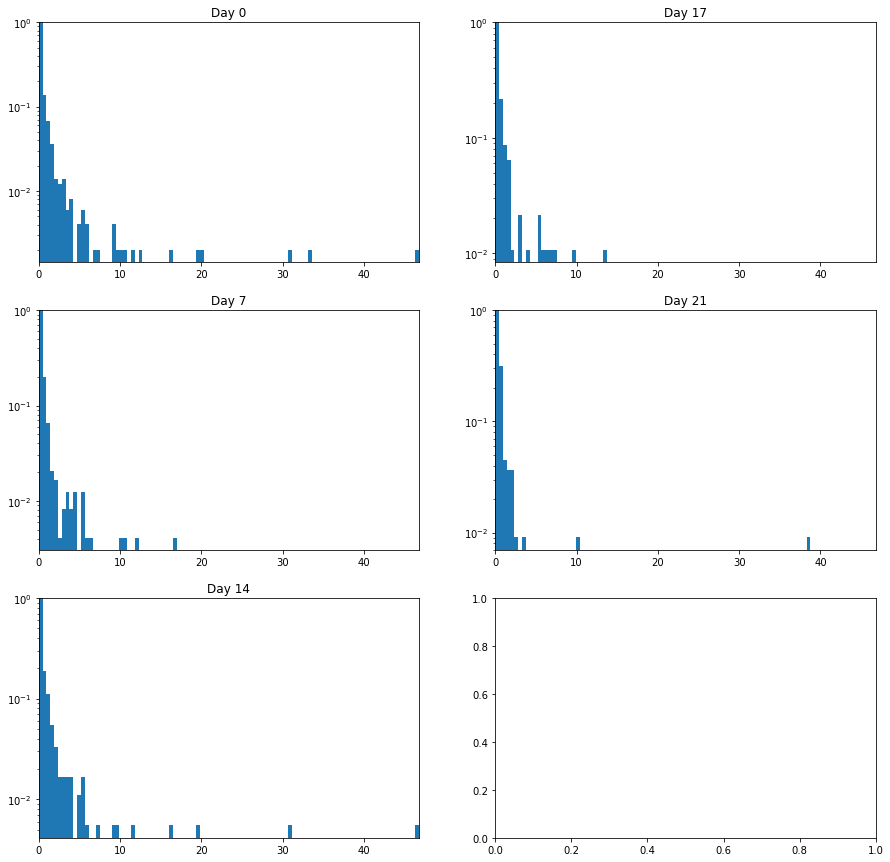

In [50]:
# mito
maxval = df_mito['Volume3d_µm^3'].max()
minval = df_mito['Volume3d_µm^3'].min()
print(maxval)
print(minval)
bins = np.linspace(minval + (maxval - minval)* 0, minval + (maxval - minval)* 1, num = 100)
# bins = np.linspace(500000000, minval + (maxval - minval)* 1, num = 50)
days = [0, 7, 14, 17, 21]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, day in enumerate(days):
    df_tmp = df_mito.loc[df_mito['day'] == day, :]
    axes[i%3, i//3].hist(df_tmp['Volume3d_µm^3'], bins= bins, log=True, density = True)
    axes[i%3, i//3].set_xlim([0, maxval])
    axes[i%3, i//3].set_ylim([0, 1])
    axes[i%3, i//3].set_title('Day ' + str(day))
plt.show()

1311.66
0.0003004190000000001


C:\Users\wucci_admin\Anaconda3\envs\tfdl02\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()


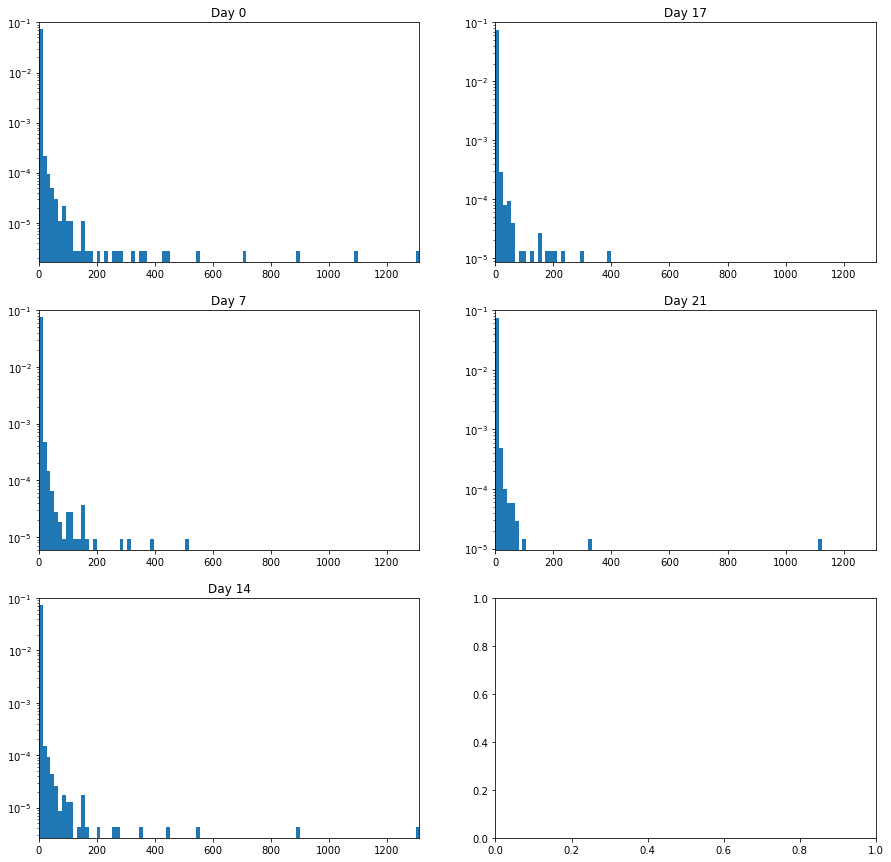

In [23]:
# cristae
maxval = df_cristae['Area3d_µm^2'].max()
minval = df_cristae['Area3d_µm^2'].min()
print(maxval)
print(minval)
bins = np.linspace(minval + (maxval - minval)* 0, minval + (maxval - minval)* 1, num = 100)
# bins = np.linspace(500000000, minval + (maxval - minval)* 1, num = 50)
days = [0, 7, 14, 17, 21]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, day in enumerate(days):
    df_tmp = df_cristae.loc[df_cristae['day'] == day, :]
    axes[i%3, i//3].hist(df_tmp['Area3d_µm^2'], bins= bins, log=True, density = True)
    axes[i%3, i//3].set_xlim([0, maxval])
    axes[i%3, i//3].set_ylim([0, 0.1])
    axes[i%3, i//3].set_title('Day ' + str(day))
plt.show()

86.4886
1e-06


C:\Users\wucci_admin\Anaconda3\envs\tfdl02\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


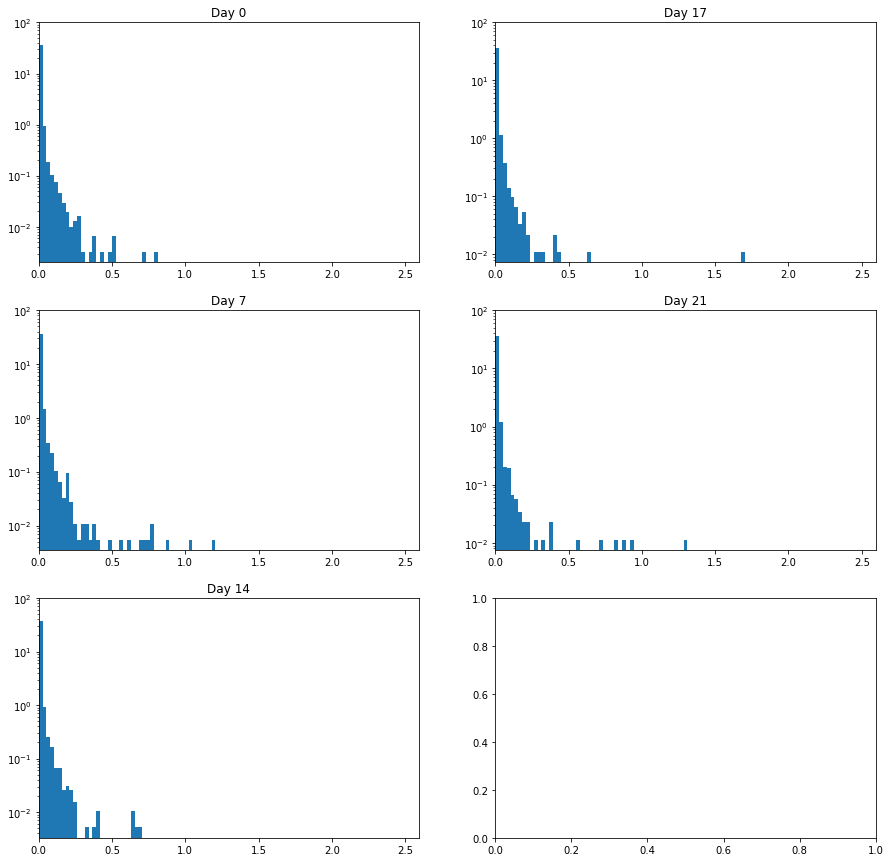

In [46]:
# ER
maxval = df_ER['Volume3d_µm^3'].max()
minval = df_ER['Volume3d_µm^3'].min()
print(maxval)
print(minval)
factor = 0.03

bins = np.linspace(minval + (maxval - minval)* 0, minval + (maxval - minval)* factor, num = 100)
days = [0, 7, 14, 17, 21]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, day in enumerate(days):
    df_tmp = df_ER.loc[df_ER['day'] == day, :]
    axes[i%3, i//3].hist(df_tmp['Volume3d_µm^3'], bins= bins, log=True, density = True)
    axes[i%3, i//3].set_xlim([0, minval + (maxval - minval)* factor])
    axes[i%3, i//3].set_ylim([0, 100])
    axes[i%3, i//3].set_title('Day ' + str(day))
plt.show()

261.036
1e-06


C:\Users\wucci_admin\Anaconda3\envs\tfdl02\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


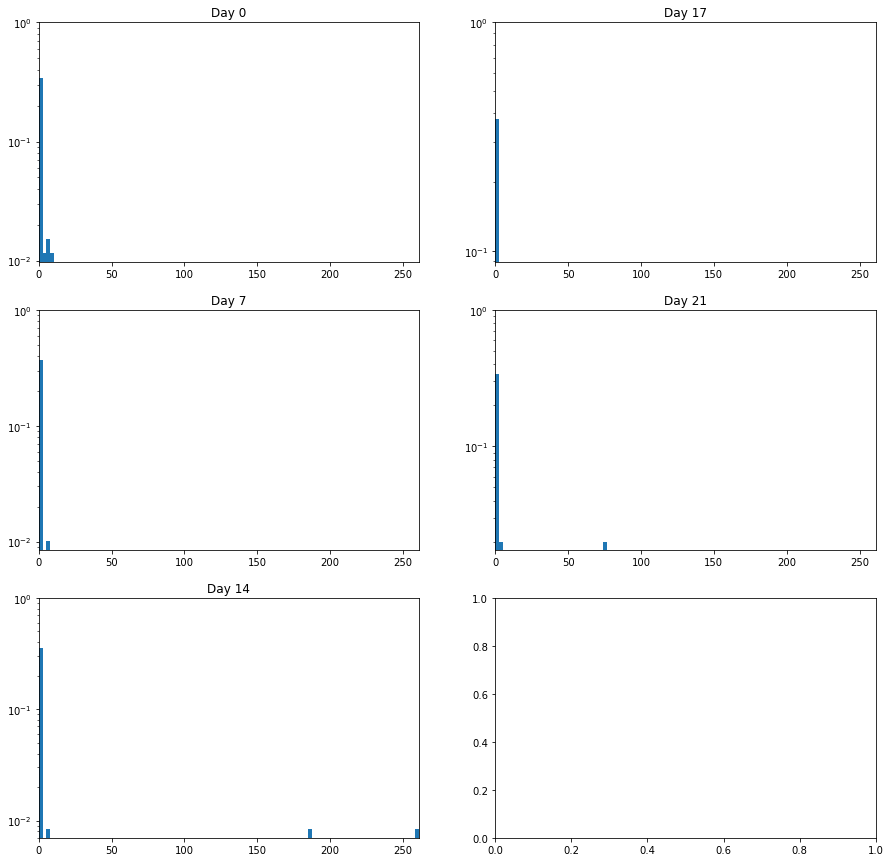

In [47]:
# inclusion
maxval = df_inclusion['Volume3d_µm^3'].max()
minval = df_inclusion['Volume3d_µm^3'].min()
print(maxval)
print(minval)
factor = 1

bins = np.linspace(minval + (maxval - minval)* 0, minval + (maxval - minval)* factor, num = 100)
days = [0, 7, 14, 17, 21]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, day in enumerate(days):
    df_tmp = df_inclusion.loc[df_inclusion['day'] == day, :]
    axes[i%3, i//3].hist(df_tmp['Volume3d_µm^3'], bins= bins, log=True, density = True)
    axes[i%3, i//3].set_xlim([0, minval + (maxval - minval)* factor])
    axes[i%3, i//3].set_ylim([0, 1])
    axes[i%3, i//3].set_title('Day ' + str(day))
plt.show()

# 03 Load Data from Auto Skeletonization of Mitocondria

## 03-01

In [26]:
mainpath = 'D:\PerlmutterData'
folder = 'segmentation_compiled_export'
data_folder = 'data'

path = os.path.join(mainpath, folder, data_folder)
print(path)

folders = ['skeleton_output']
subcat = ['nodes', 'points', 'segments_s']

D:\PerlmutterData\segmentation_compiled_export\data


In [27]:
target_list = glob.glob(os.path.join(path, 'compile', '*.csv'))
target_list = [os.path.basename(x) for x in target_list]
target_list = [os.path.splitext(x)[0] for x in target_list]
print(target_list)

['cell_membrane', 'cristae', 'ER', 'inclusion', 'mito', 'nodes', 'nucleus', 'points', 'segments_s']


In [28]:
file_meta = {
    'data_d00_batch01_loc01': 0,
    'data_d00_batch02_loc02': 0,
    'data_d00_batch02_loc03': 0,
    'data_d07_batch01_loc01': 7, 
    'data_d07_batch02_loc01': 7,
    'data_d07_batch02_loc02': 7, 
    'data_d14_batch01_loc01': 14, 
    'data_d17_batch01_loc01': 17,
    'data_d21_batch01_loc01': 21,
}

In [29]:
for i in subcat:
    file_list = glob.glob(os.path.join(path, 'raw', 'skeleton_output', '*', i + '.csv'))
    # print(file_list)
    
    if not i in target_list:
        df = pd.DataFrame()

        for j in file_list:    
            data_temp = pd.read_csv(j, header = 0)
            
            foldername_tmp = os.path.dirname(j)
            foldername_tmp = os.path.basename(foldername_tmp)
            
            # add filename
            data_temp['filename'] = foldername_tmp
            
            # add day
            pattern = re.compile("data_d[0-9][0-9]_batch[0-9][0-9]_loc[0-9][0-9]")
            original_foldername = pattern.search(foldername_tmp).group(0)
            day_tmp = file_meta[original_foldername]
            
            data_temp['day'] = day_tmp
            
            df = df.append(data_temp, ignore_index = True)
            
        display(df)
        df.to_csv(os.path.join(path, 'compile', i + '.csv'))

In [30]:
df_points = pd.read_csv(os.path.join(path, 'compile', 'points' + '.csv'))
df_segments = pd.read_csv(os.path.join(path, 'compile', 'segments_s' + '.csv'))
df_nodes = pd.read_csv(os.path.join(path, 'compile', 'nodes' + '.csv'))

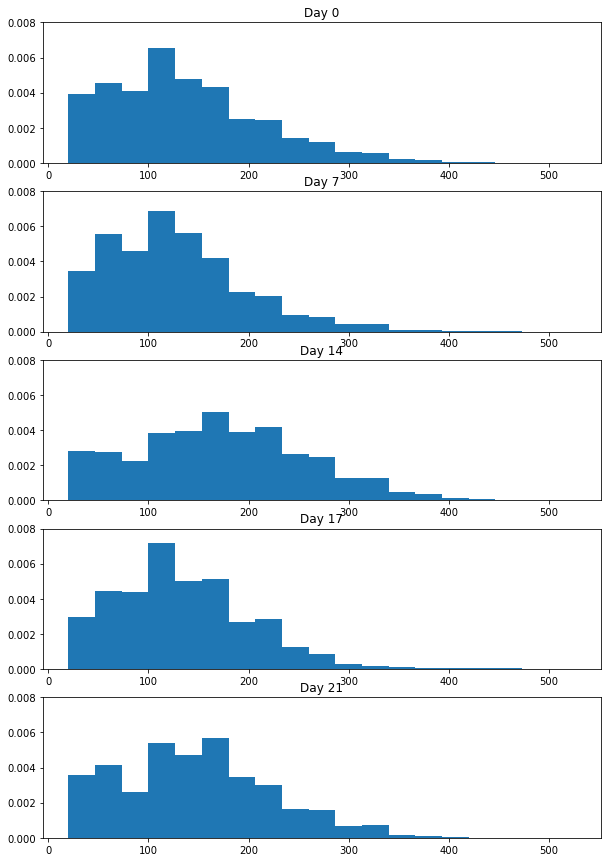

In [31]:
# points
maxval = df_points['thickness'].max()
minval = df_points['thickness'].min()
days = [0, 7, 14, 17, 21]
bins = np.linspace(minval + (maxval - minval)* 0, minval + (maxval - minval)* 1, num = 20)

nrows = 5
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))

for i, day in enumerate(days):
    df_tmp = df_points.loc[df_points['day'] == day, :]
    axes[i%nrows].hist(df_tmp['thickness'], bins= bins, log=False, density = True)
    axes[i%nrows].set_ylim([0, 0.008])
    axes[i%nrows].set_title('Day ' + str(day))
plt.show()

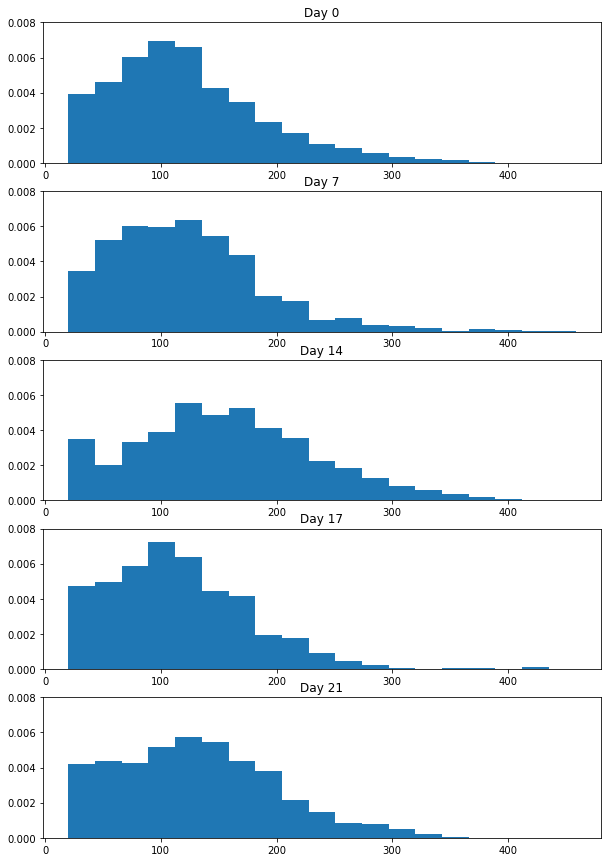

In [32]:
# segments
maxval = df_segments['thickness'].max()
minval = df_segments['thickness'].min()
days = [0, 7, 14, 17, 21]
bins = np.linspace(minval + (maxval - minval)* 0, minval + (maxval - minval)* 1, num = 20)

nrows = 5
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 15))

for i, day in enumerate(days):
    df_tmp = df_segments.loc[df_segments['day'] == day, :]
    axes[i%nrows].hist(df_tmp['thickness'], bins= bins, log=False, density = True)
    axes[i%nrows].set_ylim([0, 0.008])
    axes[i%nrows].set_title('Day ' + str(day))
plt.show()

In [33]:
df_segments_count_grouped = df_nodes.groupby(['day', 'filename', 'Coordination Number']).count().reset_index()
df_segments_count_grouped

,day,filename,Coordination Number,Unnamed: 0,Node ID,X Coord,Y Coord,Z Coord
0,0,data_d00_batch01_loc01_mito,1,452,452,452,452,452
1,0,data_d00_batch01_loc01_mito,3,601,601,601,601,601
2,0,data_d00_batch01_loc01_mito,4,111,111,111,111,111
3,0,data_d00_batch01_loc01_mito,5,20,20,20,20,20
4,0,data_d00_batch01_loc01_mito,6,13,13,13,13,13
...,...,...,...,...,...,...,...,...
63,21,data_d21_batch01_loc01_mito,3,243,243,243,243,243
64,21,data_d21_batch01_loc01_mito,4,35,35,35,35,35
65,21,data_d21_batch01_loc01_mito,5,6,6,6,6,6
66,21,data_d21_batch01_loc01_mito,6,5,5,5,5,5


In [34]:
filename = df_segments_count_grouped['filename'].unique()
print(filename)

['data_d00_batch01_loc01_mito' 'data_d00_batch02_loc02_mito'
 'data_d00_batch02_loc03_mito' 'data_d07_batch01_loc01_mito'
 'data_d07_batch02_loc01_mito' 'data_d07_batch02_loc02_mito'
 'data_d14_batch01_loc01_mito' 'data_d17_batch01_loc01_01_mito'
 'data_d17_batch01_loc01_02_mito' 'data_d21_batch01_loc01_mito']


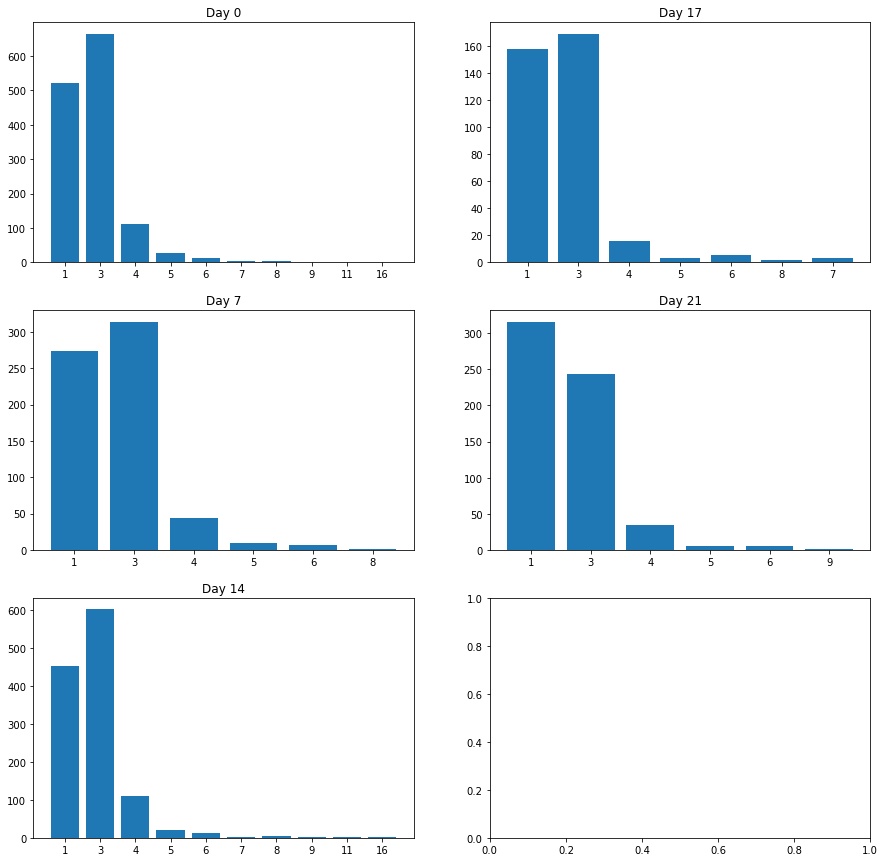

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

days = [0, 7, 14, 17, 21]

for i, day in enumerate(days):
    df_tmp = df_segments_count_grouped.loc[df_segments_count_grouped['day'] == day]
    
    x = df_tmp['Coordination Number']
    y = df_tmp['Node ID']
    x_pos = [str(i) for i in x]
    
    axes[i%3, i//3].bar(x_pos, y)
    axes[i%3, i//3].set_title('Day ' + str(day))
plt.show()

# 04 ER Inference

In [36]:
df_ER_mean_grouped

,day,filename,Unnamed: 0,Volume3d,Area3d,BaryCenterX,BaryCenterY,BaryCenterZ,Mean,index,Volume3d_µm^3,Area3d_µm^2
0,0,data_d00_batch01_loc01_ER.csv,2521.5,8.054682e+06,346682.999921,14347.676119,1871.367496,10703.924879,1.0,2522.5,0.008055,0.346683
1,0,data_d00_batch02_loc02_ER.csv,6911.0,5.119046e+06,197892.450889,10626.098799,3125.518585,7911.309465,1.0,1868.0,0.005119,0.197892
2,0,data_d00_batch02_loc03_ER.csv,10288.0,7.922718e+06,332774.530424,10757.591985,2030.938104,6227.620324,1.0,1510.0,0.007923,0.332775
3,7,data_d07_batch01_loc01_ER.csv,12478.0,1.004320e+07,366744.449270,15506.612498,2411.354219,4962.483950,1.0,681.0,0.010043,0.366744
4,7,data_d07_batch02_loc01_ER.csv,14288.5,2.044425e+07,687476.856261,9643.519023,2577.130951,6763.751836,1.0,1130.5,0.020444,0.687477
5,7,data_d07_batch02_loc02_ER.csv,17094.0,9.552707e+06,359912.763357,10127.047733,2035.010020,5934.590479,1.0,1676.0,0.009553,0.359913
6,14,data_d14_batch01_loc01_ER.csv,22459.5,1.952485e+07,729028.008832,12391.421489,3927.648782,10459.067475,1.0,3690.5,0.019525,0.729028
7,17,data_d17_batch01_loc01_01_ER.csv,27223.5,2.238514e+07,826295.307774,9011.935552,2292.567413,4709.401176,1.0,1074.5,0.022385,0.826295
8,17,data_d17_batch01_loc01_02_ER.csv,28986.5,1.007039e+07,411005.416451,15858.410467,2269.463240,16016.600348,1.0,689.5,0.010070,0.411005
9,21,data_d21_batch01_loc01_ER.csv,31367.5,1.241037e+07,462938.576389,11160.661897,2101.740460,9698.789277,1.0,1692.5,0.012410,0.462939


In [37]:
ER_mean = df_ER_mean_grouped[['day', 'Volume3d_µm^3']].groupby(['day']).mean().reset_index()
ER_mean

,day,Volume3d_µm^3
0,0,0.007032
1,7,0.013347
2,14,0.019525
3,17,0.016228
4,21,0.012410


In [38]:
ER_sem = df_ER_mean_grouped[['day', 'Volume3d_µm^3']].groupby(['day']).sem().reset_index()
ER_sem

,day,Volume3d_µm^3
0,0,0.000957
1,7,0.003552
2,14,NaN
3,17,0.006157
4,21,NaN


In [39]:
from scipy import stats
day0 = df_ER_mean_grouped.loc[df_ER_mean_grouped['day']== 0,'Volume3d_µm^3']
day7 = df_ER_mean_grouped.loc[df_ER_mean_grouped['day']== 7,'Volume3d_µm^3']

In [40]:
stats.ttest_ind(day0, day7)

Ttest_indResult(statistic=-1.7166867811684914, pvalue=0.16117388812279004)

In [58]:
day0 = df_mean_compiled.loc[df_mean_compiled['day']== 0,'inclusion_Volume3d_µm^3']
day0 = [day0[0], day0[2]]
print(day0)
day7 = df_mean_compiled.loc[df_mean_compiled['day']== 7,'inclusion_Volume3d_µm^3']
print(day7)
stats.ttest_ind(day0, day7)

[0.0, 0.1770661111111111]
3    0.408255
4    0.428822
5    0.234703
Name: inclusion_Volume3d_µm^3, dtype: float64


Ttest_indResult(statistic=-2.6013259167689067, pvalue=0.0802837987672902)